In [1]:
import os
import math
import statistics
from pathlib import Path
from IPython.display import display

from natsort import natsorted, ns
from skimage import io
from skimage.transform import rotate
from skimage.feature import canny

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn import svm
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

from skimage.exposure import histogram
from skimage import filters

from skimage.feature import graycomatrix

In [2]:
print("Enter datapath for training dataset")
train_data_folder = Path(str(input()))
print("The path for training dataset is: ",train_data_folder)

Enter datapath for training dataset

  @media print {
    .ms-editor-squiggles-container {
      display:none !important;
    }
  }
  .ms-editor-squiggles-container {
    all: initial;
  }D:/Group 11/Data/train
The path for training dataset is:  D:\Group 11\Data\train


In [3]:
print("Enter datapath for test dataset")
test_data_folder = Path(str(input()))
print("The path for test dataset is: ",test_data_folder)

Enter datapath for test dataset
D:/Group 11/Data/test
The path for test dataset is:  D:\Group 11\Data\test


In [4]:
def image_data(data_folder):

    # read images class directories
    sns_path, sns_dirs, sns_files = next(os.walk(data_folder))
    sns_path1, sns_dirs1, sns_files1 = next(os.walk(sns_path / Path(sns_dirs[0])))
    sns_path2, sns_dirs2, sns_files2 = next(os.walk(sns_path / Path(sns_dirs[1])))
    sns_path3, sns_dirs3, sns_files3 = next(os.walk(sns_path / Path(sns_dirs[2])))
    sns_path4, sns_dirs4, sns_files4 = next(os.walk(sns_path / Path(sns_dirs[3])))
    sns_path5, sns_dirs5, sns_files5 = next(os.walk(sns_path / Path(sns_dirs[4])))
    sns_path6, sns_dirs6, sns_files6 = next(os.walk(sns_path / Path(sns_dirs[5])))
    
    sns_files_list = [sns_files1,sns_files2,sns_files3,sns_files4,sns_files5,sns_files6]
    sns_path_list = [sns_path1,sns_path2,sns_path3,sns_path4,sns_path5,sns_path6]
    rot_angle = [0]

    image_array_list = []
    labels = []

    for i in rot_angle:
        for l in sns_dirs:
            for j in sns_path_list:
                for k in sns_files_list:
                    try:
                        for filename in k:
                            img = io.imread(os.path.join(j, filename))
                            img_rot = rotate(img, i, cval=255)
                            #pre_hor = (filters.prewitt_h(img_rot)).flatten()
                            #pre_ver = (filters.prewitt_v(img_rot)).flatten()
                            # Sobel Kernel
                            ed_sobel = (filters.sobel(img_rot)).flatten()

                            #canny algorithm
                            #can = (canny(img_rot)).flatten()
                            #hist, hist_centers = histogram(img_rot)
                            
                            if l in os.path.join(j, filename):
                                #image_array_list.append(pre_hor)
                                #image_array_list.append(pre_ver)
                                image_array_list.append(ed_sobel)
                                #image_array_list.append(can.astype(int))
                                #image_array_list.append(hist_centers)
                                labels.append(l)
                    except:
                        pass
    labels_array = np.array(labels)
    labels_array_true, labels_array_encoded = np.unique(labels_array, return_inverse=True)
    image_array = np.array(image_array_list)
    df=pd.DataFrame(image_array)
    df['Target']=labels_array_encoded
    return df

In [5]:
train_df = image_data(train_data_folder)

In [6]:
test_df= image_data(test_data_folder)

In [7]:
x_train = train_df.iloc[:,:-1]
y_train =train_df.iloc[:,-1]

In [8]:
x_test = test_df.iloc[:,:-1]
y_test =test_df.iloc[:,-1]

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
parameters = {'kernel':('rbf','poly'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)

In [10]:
clf.fit(x_train,y_train)
#print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('rbf', 'poly')})

In [11]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 0 0 0 0 0 3 0 3 0 0 0 1 1 1 1 1 1 1 1 1 3 1 1 0 0 0 2 0 0 0 2 4 0 2 2 1
 3 2 2 3 1 3 3 3 3 1 3 4 4 4 4 4 4 4 4 4 4 4 3 5 5 3 5 5 1 5 5 5 5 5 5]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5]
The model is 73.61111111111111% accurate


In [12]:
from mlxtend.evaluate import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import classification_report

In [13]:
print("The classification report for test dataset is as follows:")
print("***************************************************************")
print(classification_report(y_pred,y_test))
print("***************************************************************")

The classification report for test dataset is as follows:
***************************************************************
              precision    recall  f1-score   support

           0       0.83      0.59      0.69        17
           1       0.92      0.73      0.81        15
           2       0.33      0.67      0.44         6
           3       0.58      0.58      0.58        12
           4       0.92      0.92      0.92        12
           5       0.83      1.00      0.91        10

    accuracy                           0.74        72
   macro avg       0.74      0.75      0.73        72
weighted avg       0.78      0.74      0.75        72

***************************************************************


The confusion matrix for test dataset is as follows:


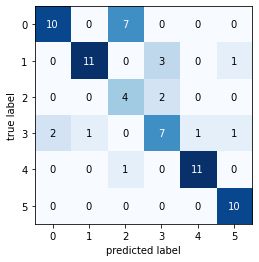

In [14]:
print("The confusion matrix for test dataset is as follows:")
cm_test_data = confusion_matrix(y_pred,y_test, 
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_test_data) 
                                #class_names=test_labels_array_true)
plt.show()

In [15]:
print("Enter datapath for test dataset")
#valid_data_folder = Path(str(input()))
valid_data_folder = Path("D:/Group 11/Data/valid")
print("The path for test dataset is: ",valid_data_folder)

Enter datapath for test dataset
The path for test dataset is:  D:\Group 11\Data\valid


In [16]:
valid_df = image_data(valid_data_folder)

In [17]:
x_valid = valid_df.iloc[:,:-1]
y_valid =valid_df.iloc[:,-1]

In [18]:
y_valid_pred = clf.predict(x_valid)
print("The predicted Data is :")
print(y_valid_pred)
print("The actual data is:")
print(np.array(y_valid))
print(f"The model is {accuracy_score(y_valid_pred,y_valid)*100}% accurate")

The predicted Data is :
[0 3 3 3 0 0 0 3 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 0 2 2 2 2 0 2 4 0 2 0 3
 3 3 3 4 3 4 4 1 3 3 4 4 4 4 4 4 3 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5]
The actual data is:
[0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5]
The model is 79.16666666666666% accurate


In [19]:
print("The classification report for test dataset is as follows:")
print("***************************************************************")
print(classification_report(y_valid_pred,y_valid))
print("***************************************************************")

The classification report for test dataset is as follows:
***************************************************************
              precision    recall  f1-score   support

           0       0.67      0.67      0.67        12
           1       1.00      0.92      0.96        13
           2       0.58      1.00      0.74         7
           3       0.58      0.58      0.58        12
           4       0.92      0.69      0.79        16
           5       1.00      1.00      1.00        12

    accuracy                           0.79        72
   macro avg       0.79      0.81      0.79        72
weighted avg       0.82      0.79      0.79        72

***************************************************************


The confusion matrix for test dataset is as follows:


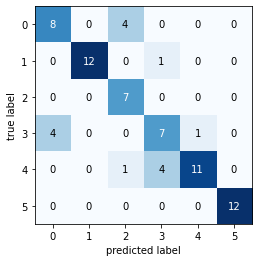

In [20]:
print("The confusion matrix for test dataset is as follows:")
cm_test_data = confusion_matrix(y_valid_pred,y_valid, 
                      binary=False)

fig, ax = plot_confusion_matrix(conf_mat=cm_test_data) 
                                #class_names=test_labels_array_true)
plt.show()